# Feature Engineering

In [26]:
from ml_tools.data_exploration import info
info()

Available functions and objects:
1 - summarize_dataframe
2 - drop_constant_columns
3 - drop_rows_with_missing_data
4 - show_null_columns
5 - drop_columns_with_missing_data
6 - drop_macro
7 - clean_column_names
8 - split_features_targets
9 - split_continuous_binary
10 - plot_correlation_heatmap
11 - plot_value_distributions
12 - clip_outliers_single
13 - clip_outliers_multi
14 - match_and_filter_columns_by_regex
15 - standardize_percentages


In [27]:
from ml_tools.data_exploration import (summarize_dataframe,
                                       drop_macro,
                                       clean_column_names,
                                       split_features_targets,
                                       split_continuous_binary,
                                       plot_correlation_heatmap,
                                       plot_value_distributions,
                                       standardize_percentages,
                                       match_and_filter_columns_by_regex)
from ml_tools.utilities import load_dataframe, serialize_object, save_dataframe, merge_dataframes
from paths import PM
from helpers.constants import TARGETS

## 1 Load data

In [28]:
df_start, _ = load_dataframe(df_path=PM["processed data"], kind="pandas")


🐉 2025-10-07 14:32 [✅ INFO] - 💾 Loaded PANDAS dataset: 'processed_data' with shape: (3397, 639)


## 2 Clean Data

In [29]:
df_clean_1 = drop_macro(df=df_start, # type: ignore
           log_directory=PM["feature engineering metrics"],
           targets=TARGETS,
           skip_targets=False,
           threshold=0.75)


🐉 2025-10-07 14:32 [✅ INFO] - Saved dataset: 'Missing_Data_start.csv' with shape: (14, 3)

🐉 2025-10-07 14:32 [✅ INFO] - 🧹 Dropped 0 constant columns.

🐉 2025-10-07 14:32 [✅ INFO] - 🧹 Dropping 76 rows with all target columns missing.

🐉 2025-10-07 14:32 [✅ INFO] - No rows exceed the 75% missing feature data threshold.

🐉 2025-10-07 14:32 [✅ INFO] - 🧹 Dropping columns with more than 75% missing data:

🐉 2025-10-07 14:32 [✅ INFO] - 🧹 Dropped 8 constant columns.

🐉 2025-10-07 14:32 [✅ INFO] - 🧹 Dropping 39 rows with all target columns missing.

🐉 2025-10-07 14:32 [✅ INFO] - No rows exceed the 75% missing feature data threshold.

🐉 2025-10-07 14:32 [✅ INFO] - No columns have more than 75% missing data.

🐉 2025-10-07 14:32 [✅ INFO] - 🧹 Dropped 3 constant columns.


['Epoxy/Epoxy Ratio', 'Accelerator Content(%)', 'Fracture Toughness(MPa m0.5)', 'Shear Strength(MPa)']
    Epoxy_eepn
    Filler_mdi-gp
    Epoxy_eepn-dgeba
    Accelerator_etppb
    Epoxy_null
    Curing_dach
    Filler_gp
    Curing_mdea
    Filler_ngp
    Filler_eg
    Filler_mma-edma



🐉 2025-10-07 14:32 [✅ INFO] - No rows found where all targets are missing.

🐉 2025-10-07 14:32 [✅ INFO] - No rows exceed the 75% missing feature data threshold.

🐉 2025-10-07 14:32 [✅ INFO] - No columns have more than 75% missing data.

🐉 2025-10-07 14:32 [✅ INFO] - 🧹 Dropped 0 constant columns.

🐉 2025-10-07 14:32 [✅ INFO] - No rows found where all targets are missing.

🐉 2025-10-07 14:32 [✅ INFO] - No rows exceed the 75% missing feature data threshold.

🐉 2025-10-07 14:32 [✅ INFO] - No columns have more than 75% missing data.

🐉 2025-10-07 14:32 [✅ INFO] - Saved dataset: 'Missing_Data_final.csv' with shape: (10, 3)


In [31]:
_df, null_columns = match_and_filter_columns_by_regex(df=df_clean_1, pattern=r'none|null')
null_columns


🐉 2025-10-07 14:32 [✅ INFO] - 4 columns match the regex pattern 'none|null'.


['Curing_null', 'Filler_null', 'Filler_oxazolidinone', 'Accelerator_null']

In [32]:
df_clean_2 = df_clean_1.drop(columns=['Curing_null', 'Filler_null', 'Accelerator_null'])

In [33]:
df_clean = clean_column_names(df_clean_2, replacement_char=" ")


🐉 2025-10-07 14:35 [✅ INFO] - Cleaned 40 column name(s) containing special characters:


    'Curing_1,3-bac' -> 'Curing_1 3-bac'
    'Curing_4,4-diepoxydiphenylimine,2e4mi' -> 'Curing_4 4-diepoxydiphenylimine 2e4mi'
    'Curing_4,4-diepoxydiphenylimine,dds' -> 'Curing_4 4-diepoxydiphenylimine dds'
    'Curing_9035,ga' -> 'Curing_9035 ga'
    'Curing_afd,ddm' -> 'Curing_afd ddm'
    'Curing_apa,m-xda' -> 'Curing_apa m-xda'
    'Curing_api,ipda' -> 'Curing_api ipda'
    'Curing_bapp,haa' -> 'Curing_bapp haa'
    'Curing_bvn,vpd' -> 'Curing_bvn vpd'
    'Curing_ceppa-ao,bpa-ao,c-ao,deta' -> 'Curing_ceppa-ao bpa-ao c-ao deta'
    'Curing_dat,haa' -> 'Curing_dat haa'
    'Curing_ddm,detda' -> 'Curing_ddm detda'
    'Curing_ddm,haa' -> 'Curing_ddm haa'
    'Curing_deapm,deta' -> 'Curing_deapm deta'
    'Curing_deapm,deta,app' -> 'Curing_deapm deta app'
    'Curing_deta,mh' -> 'Curing_deta mh'
    'Curing_deta,teta' -> 'Curing_deta teta'
    'Curing_detda,ipda' -> 'Curing_detda ipda'
    'Curing_dicy,dopo-dicy' -> 'Curing_dicy dopo-dicy'
    'Curing_emi-2,4' -> 'Curing_emi-2 4'


In [34]:
summarize_dataframe(df_clean)

DataFrame Shape: (3282, 621)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
Epoxy_a80,int64,3282,2,0.00,0.00,0.02,0.00,0.00,0.0,0.00,1.00
Epoxy_acrylate,int64,3282,2,0.00,0.01,0.10,0.00,0.00,0.0,0.00,1.00
Epoxy_ad301,int64,3282,2,0.00,0.00,0.02,0.00,0.00,0.0,0.00,1.00
Epoxy_aep1,int64,3282,2,0.00,0.00,0.02,0.00,0.00,0.0,0.00,1.00
Epoxy_aep2,int64,3282,2,0.00,0.00,0.02,0.00,0.00,0.0,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
Flexural Modulus(MPa),float64,877,679,73.28,12058.86,28412.67,0.62,2483.06,3000.0,3990.00,190990.00
Impact Strength(kJ/m2),float64,1214,806,63.01,297.11,2402.38,0.00,9.25,17.0,33.50,33572.23
Young Modulus(MPa),float64,1044,802,68.19,2941.05,7998.55,0.08,1011.25,2080.0,3010.00,217300.00
Tensile Strength(MPa),float64,2602,1647,20.72,116.02,330.50,0.13,42.30,60.1,76.68,6000.00


## 3 Fix percentages

In [35]:
_df_percent, percent_columns= match_and_filter_columns_by_regex(df=df_clean, pattern=r"%")

df_fixed = standardize_percentages(df=df_clean, columns=percent_columns)


🐉 2025-10-07 14:36 [✅ INFO] - 3 columns match the regex pattern '%'.


## 4 Split data

### 4.1 Features / Targets

In [36]:
df_features, df_targets = split_features_targets(df=df_fixed, 
                                                 targets=TARGETS)

Original shape: (3282, 621)
Features shape: (3282, 615)
Targets shape: (3282, 6)


### 4.2 Continuous / Binary

In [37]:
df_continuous, df_binary = split_continuous_binary(df_features)

Continuous columns shape: (3282, 4)
Binary columns shape: (3282, 611)


### 4.3 Summarize datasets

In [38]:
summarize_dataframe(df_continuous)

DataFrame Shape: (3282, 4)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
Epoxy/Curing Ratio,float64,2947,393,10.21,6.69,15.43,0.00,1.67,3.45,4.76,200.00
Carbon Fiber(%),float64,920,33,71.97,12.39,24.00,0.00,0.00,0.00,0.00,100.00
Filler Proportion(%),float64,2594,173,20.96,22.32,61.53,0.00,4.00,10.00,25.00,2025.00
Temperature(K),float64,2027,56,38.24,368.11,35.12,298.15,353.15,363.15,393.15,473.15


In [39]:
summarize_dataframe(df_binary)

DataFrame Shape: (3282, 611)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
Accelerator_1-mi,int64,3282,2,0.0,0.01,0.07,0.0,0.0,0.0,0.0,1.0
Accelerator_2-mi,int64,3282,2,0.0,0.01,0.11,0.0,0.0,0.0,0.0,1.0
Accelerator_2e4mi,int64,3282,2,0.0,0.01,0.12,0.0,0.0,0.0,0.0,1.0
Accelerator_anhydrous zinc acetate + zinc acetylacetonate,int64,3282,2,0.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0
Accelerator_basf-catalyst,int64,3282,2,0.0,0.00,0.02,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
Filler_zif,int64,3282,2,0.0,0.01,0.07,0.0,0.0,0.0,0.0,1.0
Filler_zinc-hydroxystannate,int64,3282,2,0.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
Filler_zn-fe-ldh,int64,3282,2,0.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
Filler_zpd,int64,3282,2,0.0,0.00,0.02,0.0,0.0,0.0,0.0,1.0


In [40]:
summarize_dataframe(df_targets)

DataFrame Shape: (3282, 6)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
Flexural Strength(MPa),float64,1643,1235,49.94,229.08,597.45,1.78,74.30,100.4,130.48,7400.00
Flexural Modulus(MPa),float64,877,679,73.28,12058.86,28412.67,0.62,2483.06,3000.0,3990.00,190990.00
Impact Strength(kJ/m2),float64,1214,806,63.01,297.11,2402.38,0.00,9.25,17.0,33.50,33572.23
Young Modulus(MPa),float64,1044,802,68.19,2941.05,7998.55,0.08,1011.25,2080.0,3010.00,217300.00
Tensile Strength(MPa),float64,2602,1647,20.72,116.02,330.50,0.13,42.30,60.1,76.68,6000.00
Elongation at Break(%),float64,1246,637,62.04,15.78,30.40,1.08,4.30,6.5,11.00,375.00


In [41]:
df_targets.columns.to_list()

['Flexural Strength(MPa)',
 'Flexural Modulus(MPa)',
 'Impact Strength(kJ/m2)',
 'Young Modulus(MPa)',
 'Tensile Strength(MPa)',
 'Elongation at Break(%)']

In [42]:
df_continuous.columns.to_list()

['Epoxy/Curing Ratio',
 'Carbon Fiber(%)',
 'Filler Proportion(%)',
 'Temperature(K)']

## 5 Correlation Heatmaps


🐉 2025-10-07 14:36 [✅ INFO] - Saved correlation heatmap: 'Continuous_Features_Correlation_Heatmap.svg'


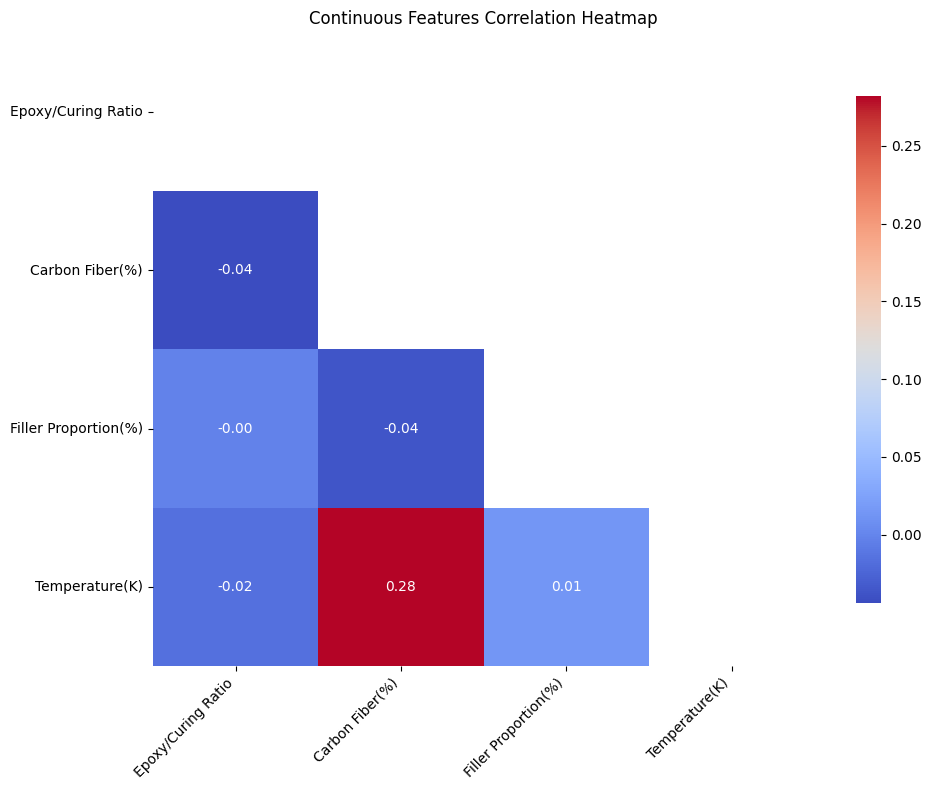

In [43]:
plot_correlation_heatmap(df=df_continuous, save_dir=PM["feature engineering metrics"], plot_title="Continuous Features Correlation Heatmap")

In [ ]:
plot_correlation_heatmap(df=df_binary, save_dir=PM["feature engineering metrics"], plot_title="Binary Features Correlation Heatmap")

## 6 Plot Value Distributions

In [18]:
plot_value_distributions(df=df_continuous, 
                         save_dir=PM["feature engineering unclip"],
                         bin_threshold=5)


🐉 2025-10-07 09:12 [✅ INFO] - Saved 4 value distribution plots.


In [19]:
plot_value_distributions(df=df_targets,
                         save_dir=PM["feature engineering unclip"],
                         bin_threshold=5)


🐉 2025-10-07 09:12 [✅ INFO] - Saved 6 value distribution plots.


## 7 Save Data

### 7.1 Save continuous and binary features

In [44]:
df_features_merged = merge_dataframes(df_continuous, df_binary, reset_index=False, direction="horizontal")


🐉 2025-10-07 14:36 [✅ INFO] - Merged DataFrame shape: (3282, 615)


➡️ DataFrame 1 shape: (3282, 4)
➡️ DataFrame 2 shape: (3282, 611)


In [49]:
serialize_object(obj=df_binary.columns.to_list(), save_dir=PM["binary columns"].parent, filename=PM["binary columns"].name)


🐉 2025-10-07 14:37 [✅ INFO] - Object of type '<class 'list'>' saved to '/home/karl/Epoxy_Design/data/Serialized Objects/BINARY_COLUMNS_list.joblib'


In [ ]:
serialize_object(obj=df_continuous.columns.to_list(), save_dir=PM["continuous columns"].parent, filename=PM["continuous columns"].name)

### 7.2 Save engineered dataset

In [45]:
df_merged = merge_dataframes(df_features_merged, df_targets, reset_index=True, direction="horizontal")


🐉 2025-10-07 14:37 [✅ INFO] - Merged DataFrame shape: (3282, 621)


➡️ DataFrame 1 shape: (3282, 615)
➡️ DataFrame 2 shape: (3282, 6)


In [46]:
summarize_dataframe(df_merged)

DataFrame Shape: (3282, 621)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
Epoxy/Curing Ratio,float64,2947,393,10.21,6.69,15.43,0.00,1.67,3.45,4.76,200.00
Carbon Fiber(%),float64,920,33,71.97,12.39,24.00,0.00,0.00,0.00,0.00,100.00
Filler Proportion(%),float64,2594,173,20.96,22.32,61.53,0.00,4.00,10.00,25.00,2025.00
Temperature(K),float64,2027,56,38.24,368.11,35.12,298.15,353.15,363.15,393.15,473.15
Accelerator_1-mi,int64,3282,2,0.00,0.01,0.07,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
Flexural Modulus(MPa),float64,877,679,73.28,12058.86,28412.67,0.62,2483.06,3000.00,3990.00,190990.00
Impact Strength(kJ/m2),float64,1214,806,63.01,297.11,2402.38,0.00,9.25,17.00,33.50,33572.23
Young Modulus(MPa),float64,1044,802,68.19,2941.05,7998.55,0.08,1011.25,2080.00,3010.00,217300.00
Tensile Strength(MPa),float64,2602,1647,20.72,116.02,330.50,0.13,42.30,60.10,76.68,6000.00


In [ ]:
save_dataframe(df=df_merged, save_dir=PM["engineered data unclip"].parent, filename=PM["engineered data unclip"].name)


🐉 2025-10-07 14:37 [✅ INFO] - Saved dataset: 'engineered_dataset.csv' with shape: (3282, 621)
